# Project: Investigate a Dataset - [European Soccer Database]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

Dataset about soccer matches includes several tables, all of them reference each other in some way. Information includes current teams and their leagues/country, players in each team and information about the match such as winning team, date, season, etc. More details will be provided throughout the notebook. 

### Question(s) for Analysis
- Does playing in Home Country increase the chances of winning?
- What are the attributes of the most frequent winners? 


<a id='wrangling'></a>
## Data Wrangling and Data Cleaning

In [1]:
#loading the data: 
import numpy as np 
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt

path = "../input/soccer/" 
database = path + 'database.sqlite' 

# sqlite3.connect() Creates a connection object
conn = sqlite3.connect(database)
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


Creating a dataframe for each SQL table: 

In [2]:
countries = pd.read_sql('SELECT * FROM Country;', conn)
player = pd.read_sql('SELECT * FROM Player;', conn)
match = pd.read_sql('SELECT * FROM Match;', conn)
league = pd.read_sql('SELECT * FROM League;', conn)
team= pd.read_sql('SELECT * FROM Team;', conn)
team_attr = pd.read_sql('SELECT * FROM Team_Attributes;', conn)

**Country table**

In [3]:
countries.head(5)

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


As we can see, this table simply conveys the name of each country id. 

**Player table**

In [4]:
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


Here we can see that we have info related to the player, as well as his/her id. 

In [5]:
player.isnull().sum(), player.duplicated().sum()

(id                    0
 player_api_id         0
 player_name           0
 player_fifa_api_id    0
 birthday              0
 height                0
 weight                0
 dtype: int64,
 0)

there are no duplicate rows or null values in this dataset. 

**Team-related tables**

In [6]:
team.head(3)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL


In [7]:
team_attr.head(3)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


In [8]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [9]:
team.isnull().sum(), team.duplicated().sum()

(id                   0
 team_api_id          0
 team_fifa_api_id    11
 team_long_name       0
 team_short_name      0
 dtype: int64,
 0)

Since there are no duplicates, each team must have its own unique id.Therefore, we can use the team table to identity team names in the team_attr table.  </br>
However, We can see there are some null values in team_fifa_api_id column, so we might avoid using this column when we inner join team with team_attr table, and instead rely on team_api_id column. 

In [10]:
team_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [11]:
team_attr['date'] = pd.to_datetime(team_attr['date'])

More than half of the number of rows in this table is null for 'buildUpPlayDribbling' column. Therefore, it might be safer to just drop this column all in all. 

In [12]:
team_attr= team_attr.drop('buildUpPlayDribbling', axis='columns', inplace=True)

We'll reconstruct the team_attr table using sql by attaching 'team name' columns to make the table more meaningful. 

In [13]:
team_attr= pd.read_sql('SELECT * FROM Team JOIN Team_Attributes ON Team.team_api_id = Team_Attributes.team_api_id;', conn)


checking updates:

In [14]:
team_attr.head(3)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,49119,9930,434,FC Aarau,AAR,1,434,9930,2010-02-22 00:00:00,60,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,49119,9930,434,FC Aarau,AAR,2,434,9930,2014-09-19 00:00:00,52,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,49119,9930,434,FC Aarau,AAR,3,434,9930,2015-09-10 00:00:00,47,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


In [15]:
team_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_api_id                     1458 non-null   int64  
 2   team_fifa_api_id                1458 non-null   int64  
 3   team_long_name                  1458 non-null   object 
 4   team_short_name                 1458 non-null   object 
 5   id                              1458 non-null   int64  
 6   team_fifa_api_id                1458 non-null   int64  
 7   team_api_id                     1458 non-null   int64  
 8   date                            1458 non-null   object 
 9   buildUpPlaySpeed                1458 non-null   int64  
 10  buildUpPlaySpeedClass           1458 non-null   object 
 11  buildUpPlayDribbling            489 non-null    float64
 12  buildUpPlayDribblingClass       14

We successfully included team names in the team_attr table.

**League table**

In [16]:
league.head(5)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [17]:
league.info(), league.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


(None, 0)

In [18]:
league= pd.read_sql('SELECT * FROM League JOIN Country ON League.country_id= Country.id;', conn)


**Match Table**

In [19]:
match.head(5)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [20]:
match.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=115)

In [21]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [22]:
match['date'] = pd.to_datetime(match['date'])

We are not concerned with all the 115 columns in this table since it's too large, so we will pick only the most important information. </br>

As a soccer fan/ analyst, what matters to me in a match is where it took place,when it took place, names of the playing team and their goals.  </br>

Therefore we will only need country_id, league_id, season, stage, date, match_api_id, home_team_api_id, away_team_api_id, home_team_goal and away_team_goal. </br>

Since most of the info we have is in the form of numerical IDs we will need to use the aid of the other tables to get the corresponding name for each ID, making our table more readable.

In [23]:
match= pd.read_sql('SELECT match_api_id, Country.name as country_name, League.name as league_name, HomeTeam.team_long_name as HomeTeam_long_name, HomeTeam.team_short_name as HomeTeam_short_name , AwayTeam.team_long_name as AwayTeam_long_name , AwayTeam.team_short_name as AwayTeam_short_name, season, stage, date, home_team_api_id, away_team_api_id, home_team_goal,  away_team_goal FROM Match JOIN Country ON Match.country_id= Country.id JOIN League ON Match.league_id= League.id JOIN Team HomeTeam on Match.home_team_api_id=HomeTeam.team_api_id JOIN Team AwayTeam on Match.away_team_api_id=AwayTeam.team_api_id;', conn)
match

,match_api_id,country_name,league_name,HomeTeam_long_name,HomeTeam_short_name,AwayTeam_long_name,AwayTeam_short_name,season,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,492473,Belgium,Belgium Jupiler League,KRC Genk,GEN,Beerschot AC,BAC,2008/2009,1,2008-08-17 00:00:00,9987,9993,1,1
1,492474,Belgium,Belgium Jupiler League,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK,2008/2009,1,2008-08-16 00:00:00,10000,9994,0,0
2,492475,Belgium,Belgium Jupiler League,KSV Cercle Brugge,CEB,RSC Anderlecht,AND,2008/2009,1,2008-08-16 00:00:00,9984,8635,0,3
3,492476,Belgium,Belgium Jupiler League,KAA Gent,GEN,RAEC Mons,MON,2008/2009,1,2008-08-17 00:00:00,9991,9998,5,0
4,492477,Belgium,Belgium Jupiler League,FCV Dender EH,DEN,Standard de Liège,STL,2008/2009,1,2008-08-16 00:00:00,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,1992091,Switzerland,Switzerland Super League,FC St. Gallen,GAL,FC Thun,THU,2015/2016,9,2015-09-22 00:00:00,10190,10191,1,0
25975,1992092,Switzerland,Switzerland Super League,FC Vaduz,VAD,FC Luzern,LUZ,2015/2016,9,2015-09-23 00:00:00,9824,10199,1,2
25976,1992093,Switzerland,Switzerland Super League,Grasshopper Club Zürich,GRA,FC Sion,SIO,2015/2016,9,2015-09-23 00:00:00,9956,10179,2,0
25977,1992094,Switzerland,Switzerland Super League,Lugano,LUG,FC Zürich,ZUR,2015/2016,9,2015-09-22 00:00:00,7896,10243,0,0


In [24]:
match.info(), match.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_api_id         25979 non-null  int64 
 1   country_name         25979 non-null  object
 2   league_name          25979 non-null  object
 3   HomeTeam_long_name   25979 non-null  object
 4   HomeTeam_short_name  25979 non-null  object
 5   AwayTeam_long_name   25979 non-null  object
 6   AwayTeam_short_name  25979 non-null  object
 7   season               25979 non-null  object
 8   stage                25979 non-null  int64 
 9   date                 25979 non-null  object
 10  home_team_api_id     25979 non-null  int64 
 11  away_team_api_id     25979 non-null  int64 
 12  home_team_goal       25979 non-null  int64 
 13  away_team_goal       25979 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 2.8+ MB


(None, 0)

It is clear that there are no null values, and none of the data is duplicated 

In [25]:
match['home_team_goal'].append(match['away_team_goal']).mean(), match['home_team_goal'].max(), match['away_team_goal'].max()


(1.3527656953693368, 10, 9)

<AxesSubplot:>

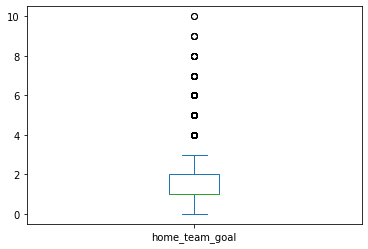

In [26]:
match['home_team_goal'].plot(kind='box')

<AxesSubplot:>

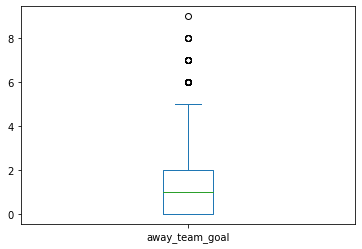

In [27]:
match['away_team_goal'].plot(kind='box')

Since a score of 10 is reasonable we can leave the values as they are. 

<a id='eda'></a>
## Exploratory Data Analysis

# Does playing in home_country increase the chances of winning? 

It might be a smart idea to start off by plotting the result of each match

In [28]:
number_of_homeTeam_wins=(match['home_team_goal']>match['away_team_goal']).sum()
number_of_homeTeam_wins

11917

In [29]:
number_of_ties=(match['home_team_goal']==match['away_team_goal']).sum()
number_of_ties

6596

In [30]:
number_of_awayTeam_wins=(match['away_team_goal']>match['home_team_goal']).sum()
number_of_awayTeam_wins

7466

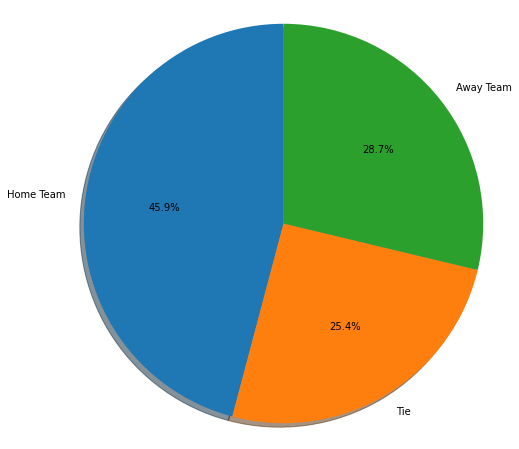

In [31]:
data = np.array([1,2,3],dtype=int) 
data[0] = number_of_homeTeam_wins
data[1] = number_of_ties
data[2] = number_of_awayTeam_wins

labels = 'Home Team', 'Tie', 'Away Team'
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(data, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

We can see that most of the winning teams are home teams. 

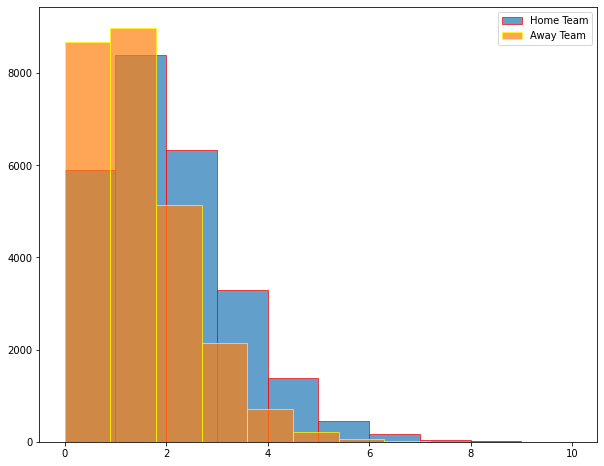

In [32]:
# importing libraries
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
# plotting first histogram
plt.hist(match['home_team_goal'], label='Home Team', alpha=.7, edgecolor='red')
  
# plotting second histogram
plt.hist(match['away_team_goal'], label='Away Team', alpha=0.7, edgecolor='yellow')
plt.legend()
  
# Showing the plot using plt.show()
plt.show()

Home teams score higher than away teams.

# What are the attributes of the most frequent winners? 

In [33]:
def winner(row):
    if row['home_team_goal'] > row['away_team_goal']:
        return row['HomeTeam_long_name']
    elif row['home_team_goal'] < row['away_team_goal']:
        return row['AwayTeam_long_name']
    else:
        return 'Tie'

match['Winner'] = match.apply(winner, axis=1)

In [34]:
match['Winner'].value_counts()

Tie                      6596
FC Barcelona              234
Real Madrid CF            228
Celtic                    218
FC Bayern Munich          193
                         ... 
SpVgg Greuther Fürth        4
FC Dordrecht                4
DSC Arminia Bielefeld       4
Córdoba CF                  3
AC Arles-Avignon            3
Name: Winner, Length: 297, dtype: int64

There are 296 teams who won atleast once. </br>
We'll compare the attributes of the top winning team with the bottom winning teams. 

In [35]:
TopWinner=match['Winner'].value_counts()[1:2].index.tolist()
TopWinner

['FC Barcelona']

In [36]:
BottomWinner=match['Winner'].value_counts()[-1:].index.tolist()
BottomWinner

['AC Arles-Avignon']

In [37]:
topTeam= pd.DataFrame(team_attr[team_attr['team_long_name'].isin(TopWinner)])

bottomTeam=pd.DataFrame(team_attr[team_attr['team_long_name'].isin(BottomWinner)])

twoTeams=topTeam.append(bottomTeam)

Text(0, 0.5, 'values')

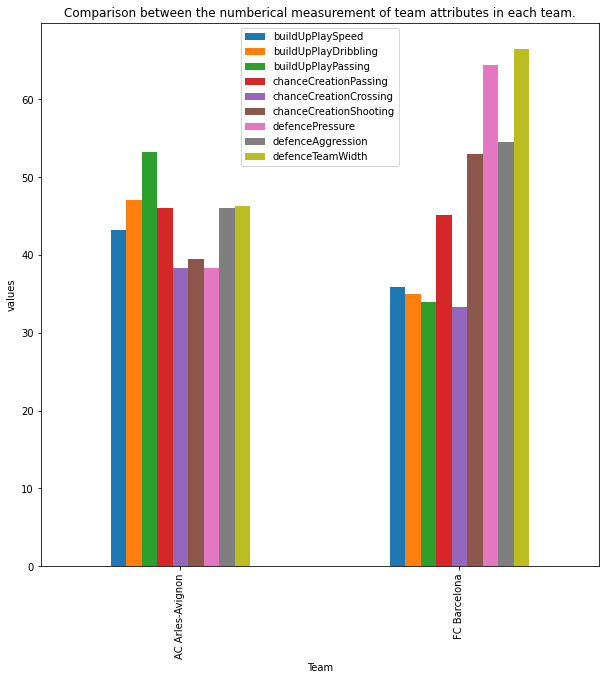

In [38]:
twoTeams.groupby(by = "team_long_name").mean()[['buildUpPlaySpeed','buildUpPlayDribbling','buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing', 'chanceCreationShooting','defencePressure', 'defenceAggression', 'defenceTeamWidth']].plot(kind = "bar",figsize=(10,10))
plt.title('Comparison between the numberical measurement of team attributes in each team.')
plt.xlabel('Team')
plt.ylabel('values')

According to the plot, there is a large difference between FC Barcelona (more frequent winner) and AC Aries-Avignon mean values for the numerical attributes. </br>
FC Barcelona has a greater defenceTeamWidth, defenceAggression, defencePrressure, and chanceCreation shooting. 

<a id='conclusions'></a>
## Conclusions
Most of the winning teams(around 50%) are Home Teams, indicating that playing at Home might likely increase the team's chances of winning the match. Home Teams also tend to score higher, showing that playing in Home country might infact be an important factor in predicting a team's success. </br>

Some of the top winning teams include FC Barcelona, Real Madrid CF, Celtic. When comparing one of the top winning team to a low-scoring team, we figured that the top winning team has 
a greater defenceTeamWidth, defenceAggression, defencePrressure, and chanceCreation shooting, all of which might be feature that correlate with the team's success. 

### Limitations
> Comparing the performance of only two teams to distinguish between the attributes of low and high scoring team is not enough to generalise this on all teams. Might try more examples. 


In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePreprocessor.enabled=True]
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too

[NbConvertApp] WARNING | pattern 'Investigate_a_Dataset.ipynb' matched no files


255